In [50]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report

In [51]:
# Map the index to the class name
class_names = [
    "ba",
    "ca",
    "da",
    "dha",
    "ga",
    "ha",
    "ja",
    "ka",
    "la",
    "ma",
    "na",
    "nga",
    "nya",
    "pa",
    "ra",
    "sa",
    "ta",
    "tha",
    "wa",
    "ya",
]

In [61]:
IMAGE_SIZE = 300

def load_and_preprocess_image(image_path, label):
    # Read the image from file
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize the image to the desired size
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])

    # Standardize the image
    # image = tf.image.per_image_standardization(image)
    image = image / 255.0

    return image, label

# Load TFLite Model

In [52]:
# Load TFLite model and allocate tensors.
# interpreter = tf.lite.Interpreter(model_path="../model/f_4_quantized.tflite")
interpreter = tf.lite.Interpreter(model_path="../model/f_4_normalized_quantized.tflite")
interpreter.allocate_tensors()

In [53]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load un-quantized model

In [75]:
# Load the .h5 model
model = tf.keras.models.load_model("../model/f_4_normalize_image.h5")

# Predictions

In [71]:
# Path to your image folders
root_dir = "./dataset/"

# Initialize lists to store labels and predictions
labels = []
predictions = []

# Iterate over all folders (each folder represents a label)
for label in os.listdir(root_dir):
    print(f"Predicting images in folder: {label}")
    # Iterate over all images in the folder
    for image_name in os.listdir(os.path.join(root_dir, label)):
        # Open and preprocess the image
        image_path = os.path.join(root_dir, label, image_name)
        input_data, _ = load_and_preprocess_image(image_path, _)
        input_data = np.expand_dims(input_data, axis=0)

        # Set the input tensor
        interpreter.set_tensor(input_details[0]["index"], input_data)

        # Invoke the interpreter
        interpreter.invoke()

        # Get the prediction results
        output_data = interpreter.get_tensor(output_details[0]["index"])

        # Append the true label and predicted label
        labels.append(label)
        predicted_class = class_names[np.argmax(output_data)]
        predictions.append(predicted_class)


# Print classification report
print(classification_report(labels, predictions))

Predicting images in folder: ba
Predicting images in folder: ca
Predicting images in folder: da
Predicting images in folder: dha
Predicting images in folder: ga
Predicting images in folder: ha
Predicting images in folder: ja
Predicting images in folder: ka
Predicting images in folder: la
Predicting images in folder: ma
Predicting images in folder: na
Predicting images in folder: nga
Predicting images in folder: nya
Predicting images in folder: pa
Predicting images in folder: ra
Predicting images in folder: sa
Predicting images in folder: ta
Predicting images in folder: tha
Predicting images in folder: wa
Predicting images in folder: ya
              precision    recall  f1-score   support

          ba       0.91      0.93      0.92        44
          ca       0.90      0.95      0.93        40
          da       0.80      0.85      0.82        33
         dha       0.90      0.92      0.91        39
          ga       0.84      0.91      0.88        47
          ha       0.87      0.

# Without quantization

In [76]:
# Path to your image folders
root_dir = "./dataset/"

# Initialize lists to store labels and predictions
labels = []
predictions = []

# Iterate over all folders (each folder represents a label)
for label in os.listdir(root_dir):
    print(f"Predicting images in folder: {label}")
    # Iterate over all images in the folder
    for image_name in os.listdir(os.path.join(root_dir, label)):
        # Open and preprocess the image
        image_path = os.path.join(root_dir, label, image_name)
        input_data, _ = load_and_preprocess_image(image_path, _)
        input_data = np.expand_dims(input_data, axis=0)

        # Make prediction
        preds = model.predict(input_data, verbose=0)

        # Append the true label and predicted label
        labels.append(label)
        predicted_class = class_names[np.argmax(preds)]
        predictions.append(predicted_class)

# Print classification report
print(classification_report(labels, predictions))

Predicting images in folder: ba
Predicting images in folder: ca
Predicting images in folder: da
Predicting images in folder: dha
Predicting images in folder: ga
Predicting images in folder: ha
Predicting images in folder: ja
Predicting images in folder: ka
Predicting images in folder: la
Predicting images in folder: ma
Predicting images in folder: na
Predicting images in folder: nga
Predicting images in folder: nya
Predicting images in folder: pa
Predicting images in folder: ra
Predicting images in folder: sa
Predicting images in folder: ta
Predicting images in folder: tha
Predicting images in folder: wa
Predicting images in folder: ya
              precision    recall  f1-score   support

          ba       0.89      0.93      0.91        44
          ca       0.91      0.97      0.94        40
          da       0.80      0.85      0.82        33
         dha       0.92      0.92      0.92        39
          ga       0.85      0.94      0.89        47
          ha       0.87      0.

# Single Prediction

In [62]:
img_path = "./dataset/ba/(1).jpg"

input_data, _ = load_and_preprocess_image(img_path, _)
input_data = np.expand_dims(input_data, axis=0)

input_data.shape

(1, 300, 300, 3)

In [63]:
# Test the model on random input data.
interpreter.set_tensor(input_details[0]["index"], input_data)

In [64]:
interpreter.invoke()

In [65]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]["index"])
print(output_data)

[[9.9805129e-01 1.0118595e-06 1.3062008e-06 1.6050002e-06 6.8647466e-07
  3.3327719e-06 4.5708404e-07 5.9312429e-06 6.1451183e-06 2.7554288e-06
  1.5592258e-06 7.9499887e-07 1.9082333e-03 2.3406987e-07 3.7497532e-06
  1.2220917e-06 1.5664813e-06 5.6378308e-06 2.6125704e-07 2.1323942e-06]]


In [66]:
# Get the index of the maximum value in the output array
predicted_index = np.argmax(output_data)

predicted_class = class_names[predicted_index]

print(predicted_class)

ba


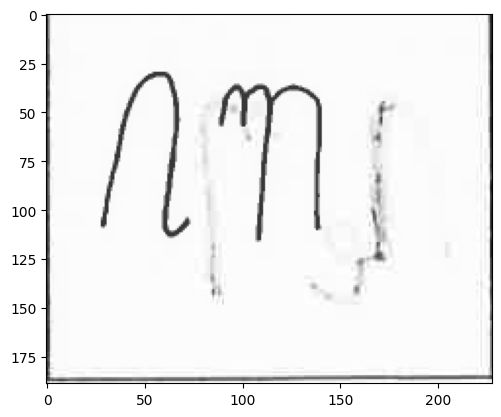

In [67]:
plt.imshow(Image.open(img_path))

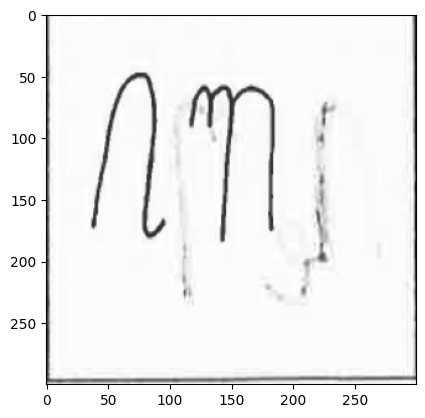

In [68]:
plt.imshow(np.squeeze(input_data))
plt.show()